In [86]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler

pd.set_option("display.max_columns", None)
pd.options.display.max_rows = 4000


In [ ]:
import nest_asyncio
nest_asyncio.apply()

In [ ]:
import stan

In [106]:
# Data Source: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers
# *NOTE: To fetch data, please run ~/get_data.sh script
df = pd.read_csv("data/BankChurners.csv")

# Data

## Data Exploration

In [107]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [108]:
# Drop variables that are not required
df.drop(
    [
        "CLIENTNUM",
        "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
        "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2",
    ],
    axis=1,
    inplace=True,
)


In [109]:
# Non-null data, balanced data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [110]:
df.describe(include="all")

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127,10127.000000,10127,10127.000000,10127,10127,10127,10127,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,2,NaN,2,NaN,7,4,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Existing Customer,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8500,NaN,5358,NaN,3128,4687,3561,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,46.325960,NaN,2.346203,NaN,NaN,NaN,NaN,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,NaN,8.016814,NaN,1.298908,NaN,NaN,NaN,NaN,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,NaN,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,NaN,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,NaN,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,NaN,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000


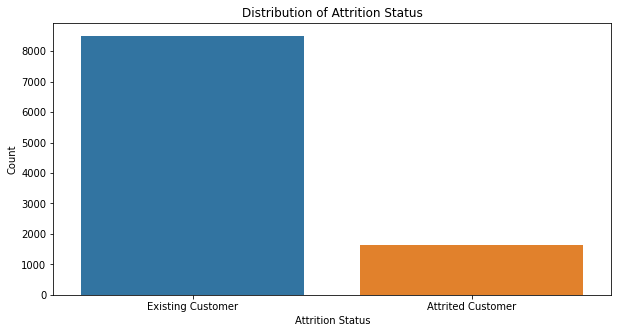

In [111]:
# Target Variable
m = df["Attrition_Flag"].value_counts()
m = m.to_frame()
m.reset_index(inplace=True)
m.columns = ["Attrition Status", "Count"]
plt.subplots(figsize=(10, 5))
sns.barplot(y="Count", x="Attrition Status", data=m)
plt.xlabel("Attrition Status")
plt.ylabel("Count")
plt.title("Distribution of Attrition Status")
plt.show()


## Data Pre-processing

### Convert target variable to binary variable

In [112]:
# Convert Categorical Variables to Numerical (1 == Bad credit)
def attrition_status(status):
    if status == "Existing Customer":
        return 0
    else:
        return 1
df["Attrition_Flag"] = df["Attrition_Flag"].apply(attrition_status)
df["Attrition_Flag"].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

### Dummification of categorical variables (OneHotEncoding)

As there are categorical values within the dataset, encoding of categorical variables is required. For non-hierarchial variables, dummification is required (e.g, Marital status, Gender and Card category), whereas Label encoding is recommended for variables with rank ordering relationship (e.g., Income level and Education level)

In [113]:
cat_features = [
    col for col in df.columns
    if (df[col].dtype == "object") & (col != "Attrition_Flag")
]
num_features = [
    col for col in df.columns
    if (df[col].dtype != "object") & (col != "Attrition_Flag")
]

In [114]:
le_features = ["Income_Category", "Education_Level"]
oe_features = [i for i in cat_features if i not in le_features]

In [115]:
def education_encoder(status):
    if status == "Unknown":
        return 0
    elif status == "Uneducated":
        return 1
    elif status == "High School":
        return 2
    elif status == "College":
        return 3
    elif status == "Graduate":
        return 4
    elif status == "Post-Graduate":
        return 5


def income_category(status):
    if status == "Unknown":
        return 0
    elif status == "Less than $40K":
        return 1
    elif status == "$40K - $60K":
        return 2
    elif status == "$60K - $80K":
        return 3
    elif status == "$80K - $120K":
        return 4
    elif status == "$120K +":
        return 5


In [116]:
df_y = df["Attrition_Flag"]
df_x = df.loc[:, num_features].astype("float32")

le_count = 0
onehot_encoders = {}
for col in oe_features:
    oe = OneHotEncoder(handle_unknown='ignore', drop="first")
    onehot_encoders[col] = oe
    df_onehot = pd.DataFrame(oe.fit_transform(df[[col]]).toarray())
    df_onehot.columns = oe.get_feature_names_out()
    le_count += 1
    df_x = pd.concat([df_x, df_onehot], axis=1)
print("%d columns were onehot encoded." % le_count)

df_x["Income_Category"] = df["Income_Category"].apply(income_category)
df_x["Education_Level"] = df["Education_Level"].apply(education_encoder)

3 columns were onehot encoded.


### Data Standardisation

In [117]:
# scaler = RobustScaler()
# df_x[num_features] = scaler.fit_transform(df_x[num_features])
scaler = StandardScaler()
df_x[:] = scaler.fit_transform(df_x)

In [118]:
df_x.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Income_Category,Education_Level
0,-0.165406,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623495,-0.959707,-0.973895,3.834003,-0.775882,1.059956,1.077338,-0.798507,-0.282609,-0.107644,-0.044484,-0.240794,0.620039,-0.282661
1,0.333570,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276,-0.943436,-0.928214,1.252337,-0.282609,-0.107644,-0.044484,-0.240794,-0.736292,0.991817
2,0.583058,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807863,-0.997155,1.059956,1.077338,-0.798507,-0.282609,-0.107644,-0.044484,-0.240794,1.298204,0.991817
3,-0.789126,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807863,1.759686,-0.943436,-0.928214,-0.798507,3.538459,-0.107644,-0.044484,-0.240794,-0.736292,-0.282661
4,-0.789126,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155,1.059956,1.077338,-0.798507,-0.282609,-0.107644,-0.044484,-0.240794,0.620039,-0.919900


In [119]:
df_x.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Income_Category,Education_Level
count,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,9.676000e+03
mean,1.333101e-16,-7.577626e-17,-3.381866e-16,-4.490445e-17,1.613754e-16,-7.858279e-17,-4.490445e-17,-7.016320e-17,3.367834e-17,-1.206807e-16,-8.980890e-17,-2.245222e-16,-5.753382e-17,8.980890e-17,6.735667e-17,2.666202e-17,-8.419584e-18,-7.156646e-17,-5.051750e-17,-5.613056e-18,-6.735667e-17,-1.066481e-16,-3.671676e-17
std,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000052e+00
min,-2.535541e+00,-1.806378e+00,-2.871068e+00,-1.809512e+00,-2.316674e+00,-2.219655e+00,-7.915266e-01,-1.426858e+00,-8.213361e-01,-3.466947e+00,-1.146344e+00,-2.337256e+00,-2.991597e+00,-9.971550e-01,-9.434357e-01,-9.282138e-01,-7.985069e-01,-2.826089e-01,-1.076441e-01,-4.448400e-02,-2.407937e-01,-1.414457e+00,-1.557139e+00
25%,-6.643815e-01,-1.036462e+00,-6.171294e-01,-5.227845e-01,-3.375979e-01,-4.116160e-01,-6.686548e-01,-9.863389e-01,-6.759604e-01,-5.882439e-01,-6.619405e-01,-8.460801e-01,-5.469819e-01,-9.137243e-01,-9.434357e-01,-9.282138e-01,-7.985069e-01,-2.826089e-01,-1.076441e-01,-4.448400e-02,-2.407937e-01,-7.362920e-01,-9.199003e-01
50%,-4.066159e-02,-2.665471e-01,8.964513e-03,1.205790e-01,-3.375979e-01,-4.116160e-01,-4.492525e-01,1.388875e-01,-4.394979e-01,-1.092203e-01,-1.486877e-01,9.123036e-02,-4.293766e-02,-3.587287e-01,-9.434357e-01,-9.282138e-01,-7.985069e-01,-2.826089e-01,-1.076441e-01,-4.448400e-02,-2.407937e-01,-5.812655e-02,-2.826612e-01
75%,7.078024e-01,5.033681e-01,5.098397e-01,7.639426e-01,6.519402e-01,4.924038e-01,2.679862e-01,7.622408e-01,2.629041e-01,4.519216e-01,9.918090e-02,6.877007e-01,4.443051e-01,8.274385e-01,1.059956e+00,1.077338e+00,1.252337e+00,-2.826089e-01,-1.076441e-01,-4.448400e-02,-2.407937e-01,6.200389e-01,9.918169e-01
max,3.327426e+00,2.043199e+00,2.513340e+00,1.407306e+00,3.620555e+00,3.204463e+00,2.848054e+00,1.661686e+00,2.975375e+00,1.203060e+01,4.144855e+00,3.158792e+00,1.260857e+01,2.626640e+00,1.059956e+00,1.077338e+00,1.252337e+00,3.538459e+00,9.289872e+00,2.247999e+01,4.152932e+00,1.976370e+00,1.629056e+00


In [120]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=9509)

In [121]:
# get shape into variables
n_train, k_train = x_train.shape
n_test, k_test = x_test.shape

In [129]:
data1 = dict(
    N=n,
    Customer_Age=x_train["Customer_Age"].values,
    Dependent_count=x_train["Dependent_count"].values,
    Months_on_book=x_train["Months_on_book"].values,
    y=y_train.values,
)


In [133]:
LR_model_code = """
data {                          
int<lower=0> N;                # number of observations
int<lower=0,upper=1> y[N];  # setting the dependent variable (vote) as binary
vector[N] Customer_Age;             # independent variable 1
vector[N] Dependent_count;              # independent variable 2
vector[N] Months_on_book;                 # independent variable 3
}
parameters {
real alpha;                    # intercept
real b_age;                # beta for educate, etc
real b_dep_count; 
real b_mob;
}
# uninformative priors for each parameter   
model {
alpha ~ normal(0,100);  
b_age ~ normal(0,100); 
b_dep_count ~ normal(0,100);
b_mob ~ normal(0,100);
y ~ bernoulli_logit(alpha + b_age * Customer_Age + b_dep_count * Dependent_count + b_mob * Months_on_book); # model
}
"""

In [134]:
LR_model = stan.build(LR_model_code, data=data1)

Building...

In file included from /Users/joonkang/Library/Caches/httpstan/4.7.2/models/vdbk3k7b/model_vdbk3k7b.cpp:2:
In file included from /Users/joonkang/.pyenv/versions/3.9.11/envs/st451_env/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/joonkang/.pyenv/versions/3.9.11/envs/st451_env/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/joonkang/.pyenv/versions/3.9.11/envs/st451_env/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/joonkang/.pyenv/versions/3.9.11/envs/st451_env/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:28:
In file included from /Users/joonkang/.pyenv/versions/3.9.11/envs/st451_env/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/operator_addition.hpp:6:
/Users/joonkang/.pyenv/versions/3.9.11/envs/st451_env/lib/python3.9/site-packages/httpstan/include/stan/math/prim/err/check_matching_dims.hpp:33:8: 


Building: 23.8s, done.Messages from stanc:
Warning in '/var/folders/9h/c59t0pfs31x6z7y5j0gplr140000gn/T/httpstan_m1uu4qnj/model_vdbk3k7b.stan', line 3, column 31: Comments
    beginning with # are deprecated and this syntax will be removed in Stan
    2.32.0. Use // to begin line comments; this can be done automatically
    using the auto-format flag to stanc
Warning in '/var/folders/9h/c59t0pfs31x6z7y5j0gplr140000gn/T/httpstan_m1uu4qnj/model_vdbk3k7b.stan', line 4, column 28: Comments
    beginning with # are deprecated and this syntax will be removed in Stan
    2.32.0. Use // to begin line comments; this can be done automatically
    using the auto-format flag to stanc
Warning in '/var/folders/9h/c59t0pfs31x6z7y5j0gplr140000gn/T/httpstan_m1uu4qnj/model_vdbk3k7b.stan', line 4, column 0: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automa

In [135]:
fit = LR_model.sample(num_chains=4, num_samples=1000)

Sampling:   0%
Sampling:   0% (1/8000)
Sampling:   0% (2/8000)
Sampling:   0% (3/8000)
Sampling:   0% (4/8000)
Sampling:   1% (103/8000)
Sampling:   3% (202/8000)
Sampling:   4% (301/8000)
Sampling:   5% (400/8000)
Sampling:   6% (500/8000)
Sampling:   8% (600/8000)
Sampling:   9% (700/8000)
Sampling:  10% (800/8000)
Sampling:  11% (900/8000)
Sampling:  12% (1000/8000)
Sampling:  14% (1100/8000)
Sampling:  15% (1200/8000)
Sampling:  16% (1300/8000)
Sampling:  18% (1400/8000)
Sampling:  19% (1500/8000)
Sampling:  20% (1600/8000)
Sampling:  21% (1700/8000)
Sampling:  22% (1800/8000)
Sampling:  24% (1900/8000)
Sampling:  25% (2000/8000)
Sampling:  26% (2100/8000)
Sampling:  28% (2200/8000)
Sampling:  29% (2300/8000)
Sampling:  30% (2400/8000)
Sampling:  31% (2500/8000)
Sampling:  32% (2600/8000)
Sampling:  34% (2700/8000)
Sampling:  35% (2800/8000)
Sampling:  36% (2900/8000)
Sampling:  38% (3000/8000)
Sampling:  39% (3100/8000)
Sampling:  40% (3200/8000)
Sampling:  41% (3300/8000)
Samplin

In [136]:
inf_data = az.convert_to_inference_data(fit)

In [137]:
inf_data

Inference data with groups:
	> posterior
	> sample_stats

<AxesSubplot:>

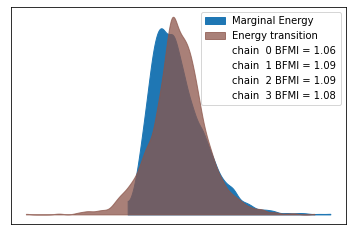

In [88]:
az.plot_energy(inf_data)

array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'b_age'}>,
        <AxesSubplot:title={'center':'b_dep_count'}>],
       [<AxesSubplot:title={'center':'b_mob'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

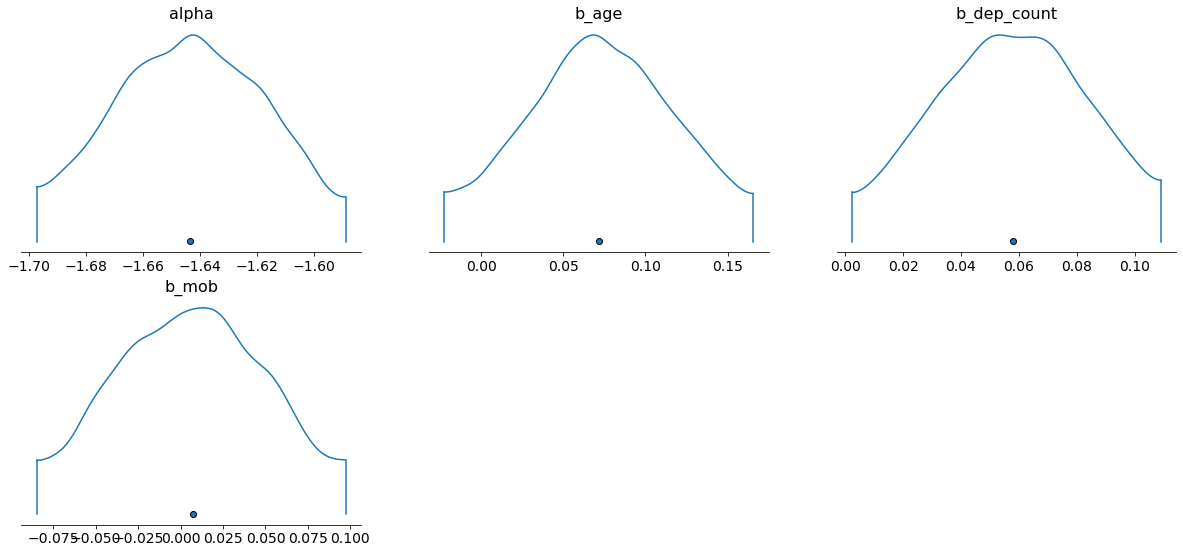

In [89]:
az.plot_density(inf_data)

In [140]:
result= fit.to_frame()

In [142]:
result.alpha.mean()

-1.6444338854888865

In [145]:
result.b_age.mean()

0.07170974519754249